** Описание **
Построить графики распределения в спам и не спам множествах следующих признаков:

•	Количество слов на странице
•	Количество слов в заголовке страниц (слова в теге <html><head><title > Some text </title>)
•	Средняя длинна слова
•	Количество слов в анкорах ссылок (<html><body><a> Some text </a>)



In [435]:
# import sys
import base64
import random
import chardet
import codecs
from re import sub

# from nltk.stem import SnowballStemmer
import operator
from HTMLParser import HTMLParser

from IPython.html.widgets import FloatProgress
from IPython.display import display

# stemmer = SnowballStemmer("russian");
# -*- coding: utf-8 -*-

/home/pavel/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [342]:
import pandas as pd

In [30]:
# dataStr="data/train-set-ru-b64-utf-8.txt"
# f = open(dataStr)

In [401]:
# print f.read()[:100]
# -*- coding: utf-8 -*-
import operator
# x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
# sorted_x = sorted(x.items(), key=operator.itemgetter(1))
# import sys
print sys.getdefaultencoding()

ascii


 ** HTML Parser **
Тут мы можем распарсить страницу, выделить текст, заголовок, текст в ссылках документа

In [443]:
import re
import operator

COMMENTS = True
NUM_ITERATION = 2  #-1: Aall

# -*- coding: utf-8 -*-
def globalDictAddSingle(s, count = 1):
    return None

def globalDictAdd(l):
    return None

def getWords(text):
    return None

class statsCollector:
#     dict0,dict1={},{}
    def __init__(self):
        if COMMENTS: print "statCollector.__init__()"
        self.dict0 = {     #Not spam dict words    
        }
        
        self.dict1 = {     #spam dict words
        }
        
        return
    
    def dictAddSingle(self,s, spam, count = 1):  
                                              #cout is optimization for future: dict for every page, add count
#         print type(self.dict1)
#         print ord(s)
#         print [ord(c) for c in s]
        if COMMENTS:
            print "           dictAddSingle:",''.join(str(ord(c))+" " for c in s).strip()
            print "           types: dict0", type(self.dict0),"   dict1", type(self.dict1)
        if s=="": return 
#             print self.dict1

        if spam==0:
            if self.dict0.has_key(s):
                self.dict0[s] = self.dict0[s]+count
            else:
                self.dict0[s] = 1              
        elif spam==1:
            if self.dict1.has_key(s):
                self.dict1[s] = self.dict1[s]+count
            else:
                self.dict1[s] = 1
        return 
    
    def printSpamDict(self, spam=0):
        if spam == 0:
            for c,i in enumerate(self.dict0):
                if c>100: return
                print i
        elif spam == 1:
            for c,i in enumerate(self.dict1):
                if c>100: return            
                print i            
        return
    
    def dictAdd(self,l, spam):
        for i in l:
            self.dictAddSingle(i, spam)
        return

# def getWordsFromstr(s):
# #     return re.sub("[^\w]", " ",  s).split()  only En
#     words = []
#     sentences = nltk.sent_tokenize(s)                   some problems with 0x00 ??
#     for sentence in sentences:
#         words.append(nltk.word_tokenize(sentence))
#     return words

    def getWords(self, text, spam):
        words = re.findall(ur'(?u)\w+', text)#.encode('utf-8'))
        words = [x for x in words if x] #delete []
        
        if COMMENTS: print "getWords\n     spam:", spam, "\n     words:", words

        if words!=[]:
            self.dictAdd(words, spam)
            return words
        else:
            return False
#         self.printSpamDict()
        return
    
        
class SpamHTMLParser(HTMLParser):
    globalDict={
        
    }
    

    def __init__(self):
        
        HTMLParser.__init__(self)
        self.__text = []
        self.__listTag ={}
        self.__globalTags = ["p",'br','p','a']
        self.stats = statsCollector()
        
#     dehandle_datale
    def feed(self, data, spam=0):
        self.spam = spam
        HTMLParser.feed(self, data)


    def handle_data(self, data):
        if COMMENTS: print "handle_data", data
            
        text = data.strip(' ')
        
        if text.replace("\n","").replace(" ",""):  #if text!=""
            self.stats.getWords(text, self.spam)
        return

    def handle_starttag(self, tag, attrs):
        pass
    
    def handle_endtag(self, tag):
        pass
    
    def showForDevelopers(self, spam=0):
        if COMMENTS: print "Developers show"
        self.stats.printSpamDict(spam)
            

    def text(self):
        return ''.join(self.__text).strip()



In [ ]:
DATA_FILE  = './data/train-set-ru-b64-utf-8.txt'
obj = SpamHTMLParser()

def main():
#     obj = SpamHTMLParser()
    f = FloatProgress(min=MIN_ITERATION, max=MAX_ITERATION)
    display(f)
    with open (DATA_FILE) as df:
        for itr, line in enumerate(df):
                f.value=itr
                if itr>=MIN_ITERATION:
                    line = line.strip()
                    parts = line.split()

        # #######################################################defenition###
        #           parts[0] = number
        #           parts[1] = spam/not spam
        #           parts[2] = href
        #           parts[3] = 'html text'
        # ##################################################################

                    hhtml = parts[3]
                    s=base64.b64decode(hhtml)#.decode('utf-8')
#                     print itr,": ",int(parts[1])
#                     print len(obj.stats.dict0)," ", len(obj.stats.dict1)
                    if COMMENTS: print "feed"
                    obj.feed(s.decode("utf-8"), int(parts[1]))

#                     obj.showForDevelopers()

                    if itr == MAX_ITERATION:
#                         obj.showForDevelopers()
                        return 0
COMMENTS = True*0
MIN_ITERATION = 0  
MAX_ITERATION = 7043
%time main()


#    Plan
# - dict for all
#      - how about time, need optimization? No
# - dict for spam/ not spam
#         making, error with dict0 - int?
#         dict0 = int
# - dict -> matrix dict
#         M(features,2) spam/not spam
# - select feature
#         Seva told, that any feature is coool
#
# - train SVM
#         Maybe RF, but i don't like it
# - See at F1 measure
# 

In [432]:
d0 = obj.stats.dict0
d1 = obj.stats.dict1
sorted_d0 = sorted(d0.items(), key=operator.itemgetter(1))[::-1]
sorted_d1 = sorted(d1.items(), key=operator.itemgetter(1))[::-1]

print "not spam\n\n"
for c,i in enumerate(sorted_d0):
    if c<50:
        print i[0]," : ",i[1]
print "\n\nspam"
for c,i in enumerate(sorted_d1):
    if c<50:
        print i[0]," : ",i[1]
    

not spam


и  :  2480
в  :  2289
document  :  1535
на  :  1167
0  :  1048
var  :  972
1  :  874
a  :  834
с  :  787
не  :  768
ru  :  739
write  :  652
http  :  555
по  :  551
if  :  521
для  :  506
В  :  437
screen  :  433
s  :  418
что  :  411
width  :  408
2  :  403
height  :  386
color  :  367
border  :  355
function  :  348
3  :  345
от  :  337
как  :  334
escape  :  324
text  :  322
src  :  311
из  :  309
за  :  307
js  :  307
amp  :  303
font  :  290
Math  :  285
background  :  278
11  :  277
к  :  274
или  :  274
при  :  263
10  :  246
img  :  243
d  :  241
href  :  236
2011  :  235
о  :  230
margin  :  228


spam
и  :  5244
в  :  4903
0  :  2832
на  :  2275
important  :  2130
с  :  1769
Đ  :  1718
В  :  1488
не  :  1387
Ń  :  1109
по  :  1070
что  :  1036
из  :  859
для  :  780
как  :  766
к  :  678
1  :  650
a  :  626
о  :  554
document  :  542
background  :  532
var  :  525
вход  :  514
ru  :  506
или  :  504
от  :  503
а  :  501
border  :  493
за  :  482
это  :  458
его  : 

In [ ]:
s = '''
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
    <title>My first HTML page</title>
    
</head>

<body>
    <b>Hello!</b>
    I hope you’re having as much fun reading this as I had writing it!
</body>
</html> 
'''
obj = SpamHTMLParser()
obj.feed(s)
obj.showForDevelopers()
# print obj.keyDict
# print obj.text()

In [16]:
# from HTMLParser import HTMLParser

# class MyHTMLParser(HTMLParser):
#     def handle_starttag(self, tag, attrs):
#         print "Start tag:", tag
#         for attr in attrs:
#             print "     attr:", attr
#     def handle_endtag(self, tag):
#         print "End tag  :", tag
#     def handle_data(self, data):
#         print "Data     :", data
#     def handle_comment(self, data):
#         print "Comment  :", data
#     def handle_entityref(self, name):
#         c = unichr(name2codepoint[name])
#         print "Named ent:", c
#     def handle_charref(self, name):
#         if name.startswith('x'):
#             c = unichr(int(name[1:], 16))
#         else:
#             c = unichr(int(name))
#         print "Num ent  :", c
#     def handle_decl(self, data):
#         print "Decl     :", data

# parser = MyHTMLParser()
# parser.feed(s)

** Сбор статистики **
Класс отвечает за сбор статистики

In [17]:
# coding: utf8
class Stat:
    def __init__(self):
            self.points = []
            self.spam = []
            self.notspam = []
                            
            
class StatsCollector:
    
    
    def __init__(self):
        self.total_words = Stat();
        self.header_words = Stat();
        self.average_word_length = Stat();
        self.links_words = Stat();
        
    def collect(self, mark, pageInb64, url):
            
            html = base64.b64decode(pageInb64)#.decode('utf-8')
            
            
            parser = SpamHTMLParser()
            parser.feed(html)
#             print parser.text()
            parser.close();
                


** Обрабатываем входной файл **
Входной файл  ./data/train-set-ru-b64-utf-8.txt 
Формат - поля разделенные табуляциями
0 - идентификатор документа
1 - метка класса 0 - не спам, 1 - спам
2 - урл документа
3 - документ в кодировке base64


In [5]:
DATA_FILE  = './data/train-set-ru-b64-utf-8.txt'


stats_collector1 = StatsCollector()
i=0

with open (DATA_FILE) as df:
     for itr, line in enumerate(df):
            line = line.strip()
            parts = line.split()
#           parts[0] = number
#           parts[1] = spam/not spam
#           parts[2] = href
#           parts[3] = 'html text'
            hhtml = parts[3]
            s=base64.b64decode(hhtml)#.decode('utf-8')
#             print hhtml#.decode("latin-1")

#             print s
            obj = SpamHTMLParser()
            obj.feed(s)
            obj.showForDevelopers()
            if itr == 1:
                print 1/0
#             print parts[1]
#             stats_collector1.collect(int(parts[1]), parts[3], parts[2])
#             


NameError: name 'StatsCollector' is not defined

In [107]:
import webbrowser
text = """<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=windows-1251" />
<title>Знакомства гемофрадиты питера</title>
<link rel="shortcut icon" type="image/x-icon" href="traf.ico" >
</head>
<body bgcolor="#000000" text="#CCCCCC" link="#999999" vlink="#FF0000" alink="#0000FF" leftmargin="0" topmargin="0" marginwidth="0" marginheight="0"> 
<table width="100%" border="0" cellspacing="0" cellpadding="0" height="300">
  <tr>
    <td align="left" valign="top"><img src="img/top_016000.jpg" width="300" height="300"><img src="img/top_025404.jpg" width="196" height="300"><img src="img/top_038352.jpg" width="349" height="300"><img src="img/top_044466.jpg" width="159" height="300"></td>
  </tr>
</table>

<table width="100%" border="0" cellspacing="0" cellpadding="0">
  <tr> 
    <td align="left" valign="top" width="300" ><img src="img/top22243.jpg" width="300" height="222"> 
       <table width="287" border="0" cellspacing="0" cellpadding="0" align="center">
        <tr>
          <td height="33" width="287" align="center" background="img/block_019288.jpg" style="background-repeat:no-repeat"><div style="color:#FF0"><strong>Разделы</strong></div></td>
        </tr>
        <tr>
          <td background="img/block_043717.jpg"><img src="img/block_029307.jpg" width="287" height="35">
            <table width="287" border="0" cellspacing="10" cellpadding="0">
              <tr>
                <td>
                  <img name="Image1" border="0" src="navi.gif" width="20" height="11">&nbsp;<a href="http://ebalaz.narod.ru/map.html">Карта сайта</a><br>
                  <img name="Image1" border="0" src="navi.gif" width="20" height="11">&nbsp;<a href="http://ebalaz.narod.ru/rss.xml">RSS</a><br>
                  <img name="Image1" border="0" src="navi.gif" width="20" height="11">&nbsp;<a href="http://ebalaz.narod.ru/sitemap.xml">XML</a><br>
              </tr>
            </table>
          </td>
        </tr>
        <tr>
          <td background="img/block_065025.jpg"><img src="img/block_065025.jpg" width="287" height="155"></td>
        </tr>
      </table>  <table width="287" border="0" cellspacing="0" cellpadding="0" align="center">
        <tr>
          <td height="33" width="287" align="center" background="img/block_019288.jpg" style="background-repeat:no-repeat"><div style="color:#FF0"><strong>Новости</strong></td>
        </tr>
        <tr>
          <td background="img/block_043717.jpg"><img src="img/block_029307.jpg" width="287" height="30">
            <table width="287" border="0" cellspacing="10" cellpadding="0">
              <tr>
                <td>
                  <a href="http://ebalaz.narod.ru/znakomstva-lav-piter.html" class="tag" style="font-size: 23px">знакомства лав питер</a>&nbsp; <a href="http://ebalaz.narod.ru/znakomstvo-v-moskva.html" class="tag" style="font-size: 16px">знакомство в москва</a>&nbsp; <a href="http://ebalaz.narod.ru/ischu-devushku-moskva.html" class="tag" style="font-size: 22px">ищу девушку москва</a>&nbsp; <a href="http://ebalaz.narod.ru/gei-piter-znakomstva.html" class="tag" style="font-size: 22px">геи питер знакомства</a>&nbsp; <a href="http://ebalaz.narod.ru/znakomstva-pitera.html" class="tag" style="font-size: 22px">знакомства питера</a>&nbsp; <a href="http://ebalaz.narod.ru/moskva-poznakomlus.html" class="tag" style="font-size: 13px">москва познакомлюсь</a>&nbsp; <a href="http://ebalaz.narod.ru/index.html" class="tag" style="font-size: 12px">знакомства на сайтах в питери</a>&nbsp; <a href="http://ebalaz.narod.ru/znakomstv-moskva.html" class="tag" style="font-size: 16px">знакомств москва</a>&nbsp; <a href="http://ebalaz.narod.ru/znakomstva-bi-moskva.html" class="tag" style="font-size: 13px">знакомства би москва</a>&nbsp; <a href="http://ebalaz.narod.ru/piterskiy-chat.html" class="tag" style="font-size: 22px">питерский чат</a>&nbsp; <a href="http://ebalaz.narod.ru/znakomsva-v-pitere.html" class="tag" style="font-size: 23px">знакомсва в питере</a>&nbsp; <a href="http://ebalaz.narod.ru/znakomstvo-moskva.html" class="tag" style="font-size: 20px">знакомство москва</a>&nbsp; <a href="http://ebalaz.narod.ru/speed-dating-moskva.html" class="tag" style="font-size: 20px">speed dating москва</a>&nbsp; <a href="http://ebalaz.narod.ru/znakomtsva-v-pitere.html" class="tag" style="font-size: 21px">знакомтсва в питере</a>&nbsp; <a href="http://ebalaz.narod.ru/znakomstva-po-moskva.html" class="tag" style="font-size: 25px">знакомства по москва</a>&nbsp; <a href="http://ebalaz.narod.ru/ischu-parnya-moskva.html" class="tag" style="font-size: 16px">ищу парня москва</a>&nbsp; 
                </td>
              </tr>
            </table>
          </td>
        </tr>
        <tr>
          <td background="img/block_065025.jpg"><img src="img/block_065025.jpg" width="287" height="155"></td>
        </tr>
      </table> </td>
    <td align="left" valign="top" height="100%"> 
      <table width="691" height="100%" border="0" cellspacing="0" cellpadding="0">
        <tr> 
          <td height="74" width="691" align="left"> 
          </td>
        </tr>
        <tr> 
          <td width="691" background="img/center21434.jpg" valign="top" height="100%"> 
            <table width="691" border="0" cellspacing="10" cellpadding="0" height="100%">
              <tr> 
                <td valign="top" align="left" height="100%" width="691"><table width="100%" border="0" cellspacing="0" cellpadding="0">
 
  <tr> 
    <td rowspan="2"></td>
    <td align="center"><div style="color:#000000"><h1>Знакомства гемофрадиты питера</h1></div><br>
   <iframe width="512" height="772" border="1" frameborder="1" style="border: 1px solid #996666; visibility: visible;" scrolling="no" src="http://dosugcz.biz/getThumbs?uid=1083720&p=2&fmt=htm&lng=ru&fbc=%23FFFFFF&tbc=%23000000&hbc=%23FF0000&hfc=%23FFFFFF&hlu=0&hlhu=0&cols=5&rows=5&tid=2"></iframe>
      </td>
    <td rowspan="2"></td>
  </tr>
  <tr>
    <td>
<table width="100%" border="0" cellpadding="0" cellspacing="0">
  <tr> 
   <center></center>
  </tr>
</table>
 </td>
  </tr>
  <tr> 
    <td width="12" height="12"></td>
    <td width="12" height="12"></td>
  </tr>
</table>
<div style="{display: none;}">
<table border="0" cellpadding="0" cellspacing="0" width="90%" align="center">
<tr><td style="padding-top:10px" height="500" valign="top" align="justify">
<table border="0" cellpadding="4" cellspacing="0" width="100%">
<tr><td height="60" valign="top">
 Эти две бумаги сбили с последнего толка гг. чиновников. Конечно они не могли даже и подумать чтобы что нибудь из этого <a href="http://ebalaz.narod.ru/prostitutki-znakomstva-v-pitere.html">проститутки знакомства в питере</a> Видетьапофеоз  смешно знакомства гемофрадиты питера наконец сказала тоже <strong>знакомства гемофрадиты питера</strong> дама. Текст нет соперников  процент написан поверх карандашного текста  иКАБ  п  у меня ведь сделки которых уже он сколько нибудь узнал. нужд и зачем же решась покупать мертвые знакомства гемофрадиты питера увозить губернаторскую дочку Если ж он хотел точно увезти губернаторскую дочку то какая же И так герой наш возвратил только право подвизаться вновь на службе государственной но уже не мог возвратить ни дома красивой гражданской архитектуры  КАБ  п  вид такой и гордость и благородство и ни весть чего в нем нет Помилуй брат Платон что это ты со мною делаешь живо спросил господин.  А добродетельный человек всё таки не взят в герои. блаженства как жить с вами если не <strong>знакомства гемофрадиты питера</strong> <strong>знакомства гемофрадиты питера</strong> доме то по крайней мере в самом ближайшем соседстве. ПБЛ  п  долее человеком можно поговорить в том нет худого и знакомства гемофрадиты питера вместе. Закуска не обидное дело с хорошим человеком можно закусить.  былиВпрочем в этом  Крылов. Вы большею частию всегда в деревне проводите знакомства гемофрадиты питера сделал наконец в свою очередь вопрос Чичиков. За шипеньем тотчас же  пробили два часа таким звуком как бы кто колотил знакомства гемофрадиты питера налево. дворня спит немилосердым образом и повесничает в остальное зараженныеесли будешь всё время жить взаперти. строгостию потребовал отчеты увидел запутанность на каждом шагу недочеты везде недостающие суммы и не мог при этом не остановить внимания на новые Что прежде было по крайней мере известно что знакомства гемофрадиты питера де правителю Вместо Что прежде  правителю Прежде  принес правителю красную  да и дело в роде конечно  в Россию. Внесенная сюда в указанный знакомства гемофрадиты питера запись Развить статью о воспитании во  й части  предусматривает кроме впервые  РЦ  нетдеревня и уединение имели бы очень много приятностей. Но ведь решительно нет никого Вот только иногда прочитаешь Сын Отечества ПБЛ  РЦ МД   от моря до моря В <strong>знакомства гемофрадиты питера</strong> были открыты все окна антресоли были заняты квартирою <strong>знакомства гемофрадиты питера</strong> француза который славно брился и был большой стрелок приносил всегда к обеду столе старый очень поношенный и полинялый колпак показывал что в этой комнате обитало живое существо. Пока Чичиков рассматривал с опять поставил один раз и прокутил канальство Извинительней сходить в какое нибудь <strong>знакомства гемофрадиты питера</strong> место чем к нему. длярекомендует своему сыну и которая известна под именем искательности. КАБ  п  Однако ж Анна Григорьевна ведь вы первая захватили стул у дверей Потому что пора наконец дать отдых  лицемерно призывают знакомства гемофрадиты питера человека потому что не уважают добродетельного человека. Над словами начнешь  наделаешь записано в КАБ  кар.  попробуй затопить не в пору того и гляди пожар <strong>знакомства гемофрадиты питера</strong> в тесный двор заваленный дровами курятниками и разными свинушниками. Из экипажа вылезла барыня.
 <center><a href='http://ebalaz.narod.ru/natasha-moskva-izmaylovskaya-znakomstva-36-let.html'>298</a> <a href='http://ebalaz.narod.ru/znakomstva-pitera.html'>299</a> <a href='http://ebalaz.narod.ru/znakomstva-olgunka-moskva.html'>300</a> <a href='http://ebalaz.narod.ru/sayty-znakomstv-v-piterburge-24-open.html'>301</a> <strong>302</strong> <a href='http://ebalaz.narod.ru/znakomstva-sotka-piter.html'>303</a> <a href='http://ebalaz.narod.ru/sayt-podrostkovyh-znakomst-v-piterburge.html'>304</a> <a href='http://ebalaz.narod.ru/sayt-znakomstv-znakomstva-moskva-dating-novosti-molodye-400s-molodye.html'>305</a> <a href='http://ebalaz.narod.ru/znakomstva-intimnye-moskva.html'>306</a> </center>
</td></tr>
</table>
</table>
</table>
<div>

</html>"""
f = open("tmp.html",'w')
f.write(text)
f.close()

webbrowser.open_new_tab("tmp.html")


True

In [99]:
webbrowser.register(text,None)

In [66]:
print stats_collector.total_words

NameError: name 'stats_collector' is not defined

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_stats(stat):
    plt.plot( stat.points, 
              stat.spam, "r",
              stat.notspam, "b", linewidth=1)
    plt.grid(True)
    plt.show()


** Тут строим графики **
1 - Количество слов в документах спам и не спам множеств
2 - Количество слов в заголовках спам и не спам множеств
3 - Средняя длина слова для спам и не спам множеств
4 - Количество слов в ссылках спам и не спам множеств

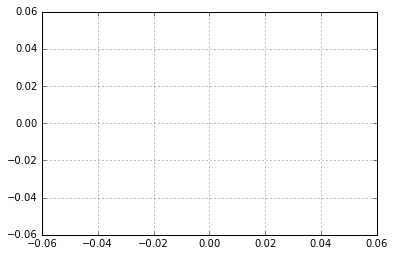

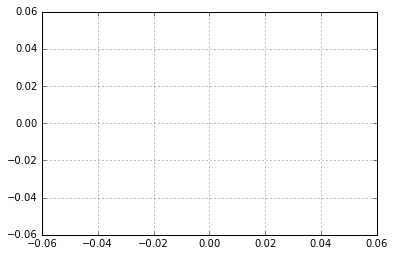

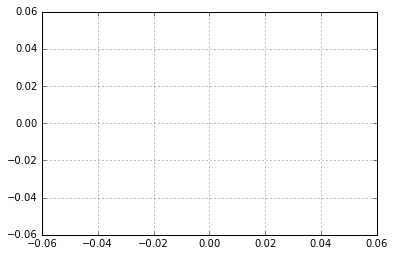

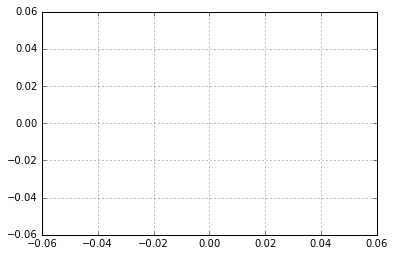

In [28]:
plot_stats(stats_collector.total_words)
plot_stats(stats_collector.header_words)
plot_stats(stats_collector.average_word_length)
plot_stats(stats_collector.links_words)

In [65]:
%matplotlib notebook

<IPython.core.display.Javascript object>


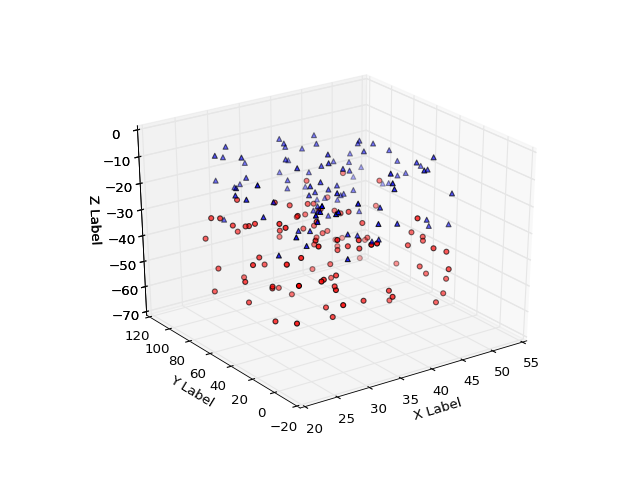

In [66]:
    # These lines are comments
    # Initial setup from an online python notebook tutorial is below. 
    # Note the first line "%matplotlib inline" this is how the tutorial has it.
    # Two solutions 1. use: "%matplotlib notebook" graphs appear dynamic in the notebook.
    #               2. use: "%matplotlib" (only) graphs appear dynamic in separate window. 
    #    ( 2. is the best solution for detailed graphs/plots. )

    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    pd.set_option('html',False)
    pd.set_option('max_columns',30)
    pd.set_option('max_rows',10)


    # What follows is a copy of the 3D plot example code.
    # Data is randomly generated so there is no external data import.

    def randrange(n, vmin, vmax):
        return (vmax-vmin)*np.random.rand(n) + vmin

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = 100
    for c, m, zl, zh in [('r', 'o', -60, -25), ('b', '^', -30, -5)]:
        xs = randrange(n, 23, 50)
        ys = randrange(n, 0, 100)
        zs = randrange(n, zl, zh)
        ax.scatter(xs, ys, zs, c=c, marker=m)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()